### oauth
- 사용자 인증

### Naver rest api
- https://developers.naver.com
- 통합검색어 트렌드 api
- 파파고 번역 api

#### .1 통합검색어 트렌드
- 네이버 데이터 랩
- 1. 애플리케이션 등록
    - client_id, client_secret
- 2. 요청 및 응답
- 3. 데이터 전처리
- 4. 그래프 그리기

In [3]:
import json

In [4]:
# 1. 어플리케이션 등록
client_id = 'client_id' # client는 삭제
client_secret = 'client_secret' # client는 삭제

In [6]:
# 2. 요청 및 응답
url = 'https://openapi.naver.com/v1/datalab/search'

In [9]:
params = {
    'startDate' : '2016-01-01',
    'endDate' : '2020-02-26',
    'timeUnit' : 'month',
    'keywordGroups' : [
        {'groupName':'트위터','keywords':['트위터','트윗']},
        {'groupName':'유투브','keywords':['유투브','유트부','유트브','유투부']},
        {'groupName':'인스타그램','keywords':['인스타그램','인스타']},
    ],
    'ages' : ['1','2','3'] # 0 ~ 25세
}

In [10]:
headers = {
    "Content-Type": "application/json",
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,
}

In [23]:
response = requests.post(url, json.dumps(params), headers = headers)
response.json()

{'startDate': '2016-01-01',
 'endDate': '2020-02-27',
 'timeUnit': 'month',
 'results': [{'title': '트위터',
   'keywords': ['트위터', '트윗'],
   'data': [{'period': '2016-01-01', 'ratio': 29.02716},
    {'period': '2016-02-01', 'ratio': 25.12499},
    {'period': '2016-03-01', 'ratio': 23.05861},
    {'period': '2016-04-01', 'ratio': 24.20508},
    {'period': '2016-05-01', 'ratio': 24.89814},
    {'period': '2016-06-01', 'ratio': 26.55218},
    {'period': '2016-07-01', 'ratio': 28.38716},
    {'period': '2016-08-01', 'ratio': 47.77887},
    {'period': '2016-09-01', 'ratio': 47.28285},
    {'period': '2016-10-01', 'ratio': 53.73692},
    {'period': '2016-11-01', 'ratio': 51.27274},
    {'period': '2016-12-01', 'ratio': 58.05657},
    {'period': '2017-01-01', 'ratio': 59.67633},
    {'period': '2017-02-01', 'ratio': 55.3955},
    {'period': '2017-03-01', 'ratio': 47.03558},
    {'period': '2017-04-01', 'ratio': 51.12786},
    {'period': '2017-05-01', 'ratio': 58.17439},
    {'period': '2017-06-

In [25]:
# 3. 데이터 전처리
datas = response.json()['results']

In [26]:
dfs = []
for data in datas:
    df =pd.DataFrame(data['data'])
    df['title'] = data['title']
    dfs.append(df)
resulf_df = pd.concat(dfs, ignore_index=True)

In [28]:
resulf_df.tail()

,period,ratio,title
145,2019-10-01,62.32972,인스타그램
146,2019-11-01,59.03968,인스타그램
147,2019-12-01,58.35049,인스타그램
148,2020-01-01,57.46769,인스타그램
149,2020-02-01,48.90618,인스타그램


In [31]:
# 굳이 더할게 없으니까, pivot_table은 쓰지않음
pivot_df = resulf_df.pivot('period','title','ratio')
pivot_df.tail()

title,유투브,인스타그램,트위터
period,,,
2019-10-01,15.25739,62.32972,65.98247
2019-11-01,14.68536,59.03968,63.56345
2019-12-01,14.26177,58.35049,63.07242
2020-01-01,12.96603,57.46769,70.39386
2020-02-01,10.86121,48.90618,60.23100


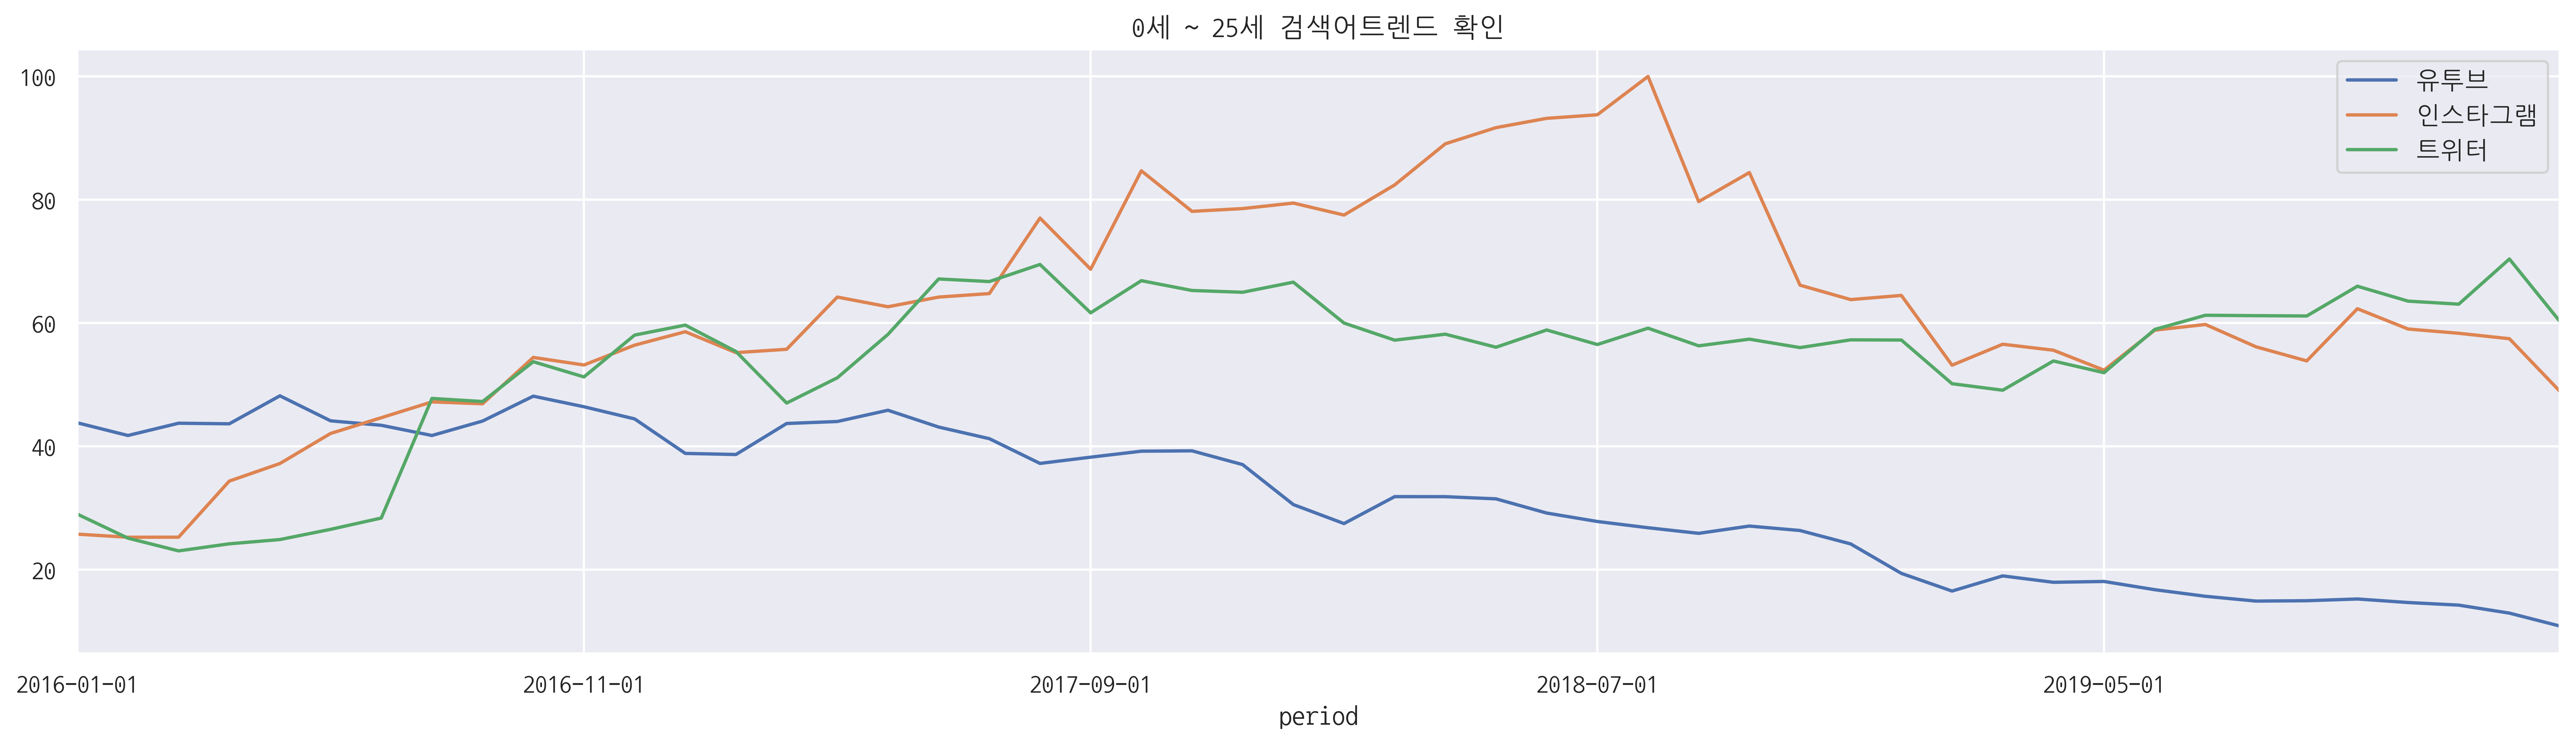

In [34]:
# 4. 그래프 그리기
pivot_df.plot(figsize = (20,5))
plt.title('0세 ~ 25세 검색어트렌드 확인')
plt.legend(loc=0)
plt.show()

### 파파고 api
- 내 어플리케이션에서 파파고 추가


In [39]:
client_id = 'client_id' # client는 삭제
client_secret = 'client_secret' # client는 삭제
url = 'https://openapi.naver.com/v1/papago/n2mt'
params = {
    'source' : 'ko',
    'target' : 'en',
    'text' : '파이썬 웹 크롤링 및 자동화'
}
headers = {
    "Content-Type": "application/json",
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,
}

In [43]:
response = requests.post(url, json.dumps(params), headers = headers)
response.json()['message']['result']['translatedText']

'Python Web crawl and automation'